In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
# Dowmload Dataframe
df=pd.read_csv('raw.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

last_review and reviews_per_month  have missing value.

In [4]:
df1=df.drop(columns=['id', 'name', 'host_id', 'host_name','last_review','reviews_per_month'])
# df1=df1.iloc[10000,:]
df1.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [5]:
# Split data into 2 Dataset
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df1, test_size=0.5, random_state=42)
x_train.shape,x_test.shape

((24447, 10), (24448, 10))

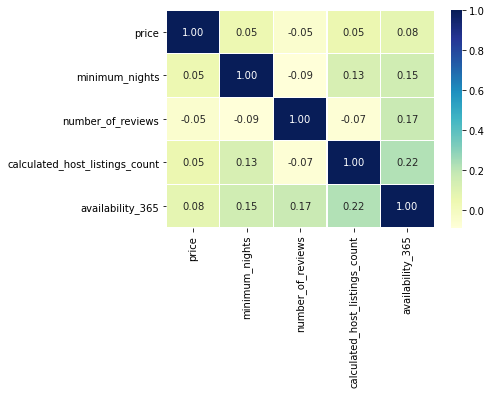

In [6]:
#plot correlation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
cols=[ 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']
cm = np.corrcoef(x_train[cols].values.T) 
f, ax = plt.subplots(figsize =(6,4)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols,  
                              xticklabels = cols, annot=True, fmt=".2f") 

Graph shows weak correlaton between 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count'and 'availability_365'.

Basic statistic  analysis of parameters in x-train data

In [7]:
x_train.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000
mean,40.728792,-73.952667,155.025566,7.092240,23.178672,7.182067,113.084918
std,0.054632,0.045736,261.155848,19.980129,44.290769,32.967817,131.840263
min,40.499790,-74.240840,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.689790,-73.983270,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.722960,-73.955840,109.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763100,-73.936670,179.000000,5.000000,24.000000,2.000000,226.000000
max,40.911690,-73.717950,10000.000000,1250.000000,607.000000,327.000000,365.000000


In [8]:
xtrain1=pd.get_dummies(x_train,columns=['neighbourhood_group', 'neighbourhood','room_type', ])
xtrain1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
5214,40.81065,-73.96312,85,2,52,2,329,0,0,1,...,0,0,0,0,0,0,0,0,1,0
24569,40.79874,-73.95990,67,2,5,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
39045,40.75198,-73.97070,595,2,3,1,55,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32011,40.74640,-73.99701,170,28,4,1,61,0,0,1,...,0,0,0,0,0,0,0,1,0,0
47623,40.71582,-73.95730,75,9,0,1,310,0,1,0,...,0,0,1,0,0,0,0,0,1,0


Getting dummy value of neighbourhood_group,neighbourhood and room_type.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_tr = scaler.fit_transform(xtrain1)

Transfor data by removing the mean and scaling to unit variance use StandardScaler feature.

The equation is z = (x - u) / s.

u is setting mean to 0. 
s is setting mean to 1.


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cluster import KMeans

In [11]:
reduced_data = PCA(n_components=2).fit_transform(xtrain_tr )

In [12]:
xtrain_tr.shape[1]

229

Reduce dimension of parameters from 229 parameters to 2 parameter by using Principal component analysis (PCA) that is Linear dimensionality reduction using Singular Value Decomposition of the data to be a lower dimensional space.

In [13]:
# Bulid dataframe
d=pd.DataFrame(x_train,columns=['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'])
d.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
5214,Manhattan,Morningside Heights,40.81065,-73.96312,Private room,85,2,52,2,329
24569,Manhattan,Upper West Side,40.79874,-73.95990,Private room,67,2,5,1,0
39045,Manhattan,Midtown,40.75198,-73.97070,Entire home/apt,595,2,3,1,55
32011,Manhattan,Chelsea,40.74640,-73.99701,Entire home/apt,170,28,4,1,61
47623,Brooklyn,Williamsburg,40.71582,-73.95730,Private room,75,9,0,1,310


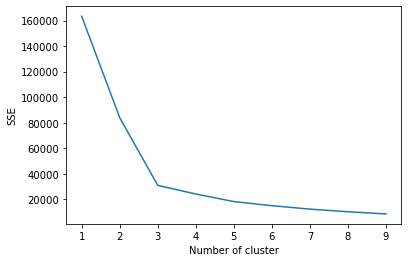

In [14]:
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(reduced_data)
    c="clusters_"+str(k)
    #labels_:Labels of each point
    d[c] = kmeans.labels_
    # inertia_: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Fitting Kmean that 1000 is Maximum number of iterations of the k-means algorithm for a single run with data reducing dimension to find the optimum number to cluater. From graph plotting number of cluster and Sum square error, the optimum mumber is 3 that is inflexion point or elbow.

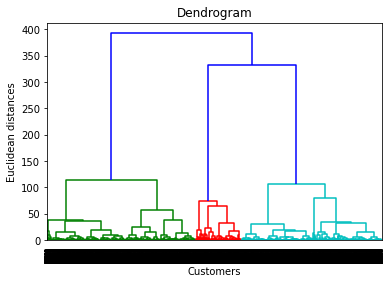

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(reduced_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From dendrogram observe cluster into 3 group

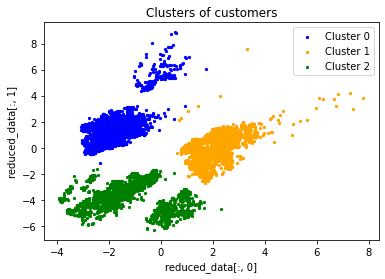

In [16]:
import matplotlib.pyplot as plt

hc = KMeans(n_clusters=3, max_iter=1000)
y_hc = hc.fit_predict(reduced_data)

# Visualising the clusters
plt.scatter(reduced_data[y_hc == 0, 0], reduced_data[y_hc == 0, 1], s = 5, c = 'blue', label = 'Cluster 0')
plt.scatter(reduced_data[y_hc == 1, 0], reduced_data[y_hc == 1, 1], s = 5, c = 'orange', label = 'Cluster 1')
plt.scatter(reduced_data[y_hc == 2, 0], reduced_data[y_hc == 2, 1], s = 5, c = 'green', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('reduced_data[:, 0]')
plt.ylabel('reduced_data[:, 1]')
plt.legend()
plt.show()

In [17]:
d.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters_1,clusters_2,clusters_3,clusters_4,clusters_5,clusters_6,clusters_7,clusters_8,clusters_9
5214,Manhattan,Morningside Heights,40.81065,-73.96312,Private room,85,2,52,2,329,0,0,0,1,3,1,1,3,3
24569,Manhattan,Upper West Side,40.79874,-73.95990,Private room,67,2,5,1,0,0,0,0,1,3,1,1,3,3
39045,Manhattan,Midtown,40.75198,-73.97070,Entire home/apt,595,2,3,1,55,0,0,0,3,0,2,4,0,1


[(-10.0, 600.0)]

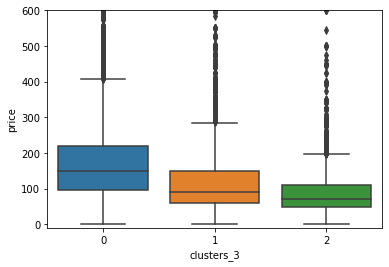

In [18]:
g=sns.boxplot(x="clusters_3", y="price", data=d)
g.set(ylim=(-10, 600))

From boxplot of the relationship between price and  3 cluster data,Cluster 1 has higher price distribution than cluster 0 and 2.

[(-5.0, 20.0)]

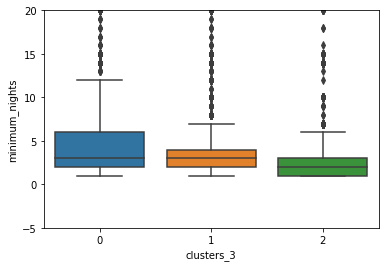

In [19]:
p=sns.boxplot(x="clusters_3", y="minimum_nights", data=d)
p.set(ylim=(-5, 20))

From boxplot of the relationship between price and  3 cluster data,Cluster 1 has wider distribution of minimum_nights than cluster 0 and 2.

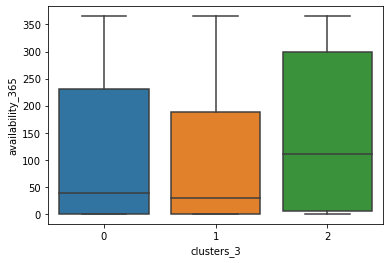

In [20]:
sns.boxplot(x="clusters_3", y="availability_365", data=d)

From boxplot of the relationship between price and  3 cluster data,Cluster 2 more avaliable than cluster 0 and 2.

In [21]:
acc2 = d.groupby(['clusters_3','neighbourhood_group'])['neighbourhood'].count()
acc2=acc2.reset_index()
acc2

,clusters_3,neighbourhood_group,neighbourhood
0,0,Brooklyn,5
1,0,Manhattan,10860
2,0,Staten Island,1
3,1,Brooklyn,10100
4,1,Queens,1
5,1,Staten Island,188
6,2,Bronx,545
7,2,Queens,2747


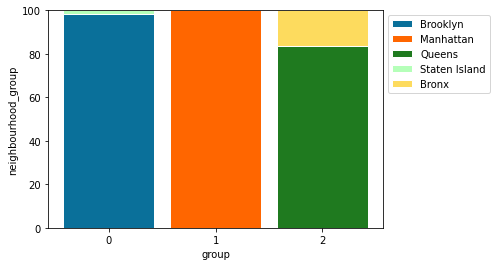

In [22]:
import numpy as np
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2]
raw_data = {'Brooklyn': [10100, 5,0], 'Queens': [1, 0, 2747],'Staten Island': [188,1,0],
           'Manhattan': [0,10860,0],'Bronx': [0,0,545]}
dat = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k+l+f for i,j,k,l,f in zip(dat['Brooklyn'], dat['Queens'], dat['Staten Island'], 
                                         dat['Manhattan'], dat['Bronx'])]
Brooklyn = [i / j * 100 for i,j in zip(dat['Brooklyn'], totals)]
Manhattan = [i / j * 100 for i,j in zip(dat['Manhattan'], totals)]
Queens = [i / j * 100 for i,j in zip(dat['Queens'], totals)]
StatenIsland = [i / j * 100 for i,j in zip(dat['Staten Island'], totals)]
Bronx = [i / j * 100 for i,j in zip(dat['Bronx'], totals)]

# plot
barWidth = 0.85
names = ('0','1','2')
plt.bar(r, Brooklyn, color='#0A709A', edgecolor='white', width=barWidth,label="Brooklyn")
plt.bar(r, Manhattan, bottom=Brooklyn, color='#ff6600', edgecolor='white', width=barWidth,label='Manhattan')
plt.bar(r, Queens, bottom=[i+j for i,j in zip(Brooklyn, Manhattan)], color='#1f7a1f',
        edgecolor='white', width=barWidth,label='Queens')
plt.bar(r, StatenIsland, bottom=[i+j+k for i,j,k in zip(Brooklyn, Manhattan,Queens)],
        color='#b5ffb9', edgecolor='white', width=barWidth,label='Staten Island')
plt.bar(r, Bronx, bottom=[i+j+k+l for i,j,k,l in zip(Brooklyn, Manhattan,StatenIsland,Queens)], 
        color= '#FDDB5E', edgecolor='white', width=barWidth,label='Bronx')

plt.xticks(r, names)
plt.ylabel("neighbourhood_group")
plt.xlabel("group")
plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)
plt.show()

From graph,most of Brooklyn,Manhattan and Queens are in cluster0,cluster1 and cluster2 respectively.

Map of new York city 

In [23]:
fplot, non_fplot = train_test_split(d, test_size=0.97, random_state=42)
fplot.shape,non_fplot.shape

((733, 19), (23714, 19))

In [24]:
from folium import plugins
import folium

# define latitude and longitude of new york city.
new_york_map = folium.Map(location=[40.730610, -73.935242], zoom_start=12)


# label each point.
for lat, lng, label, in zip(fplot.latitude, fplot.longitude,fplot.clusters_3):
#   cluster 0 is blue color
    if label==0:
        clo='blue'    
        
#   cluster 1 is orange color
    elif label==1 :
        clo='orange'
        
#   cluster 2 is green color
    elif label==2 :
        clo='green'
    folium.Marker(
            location=[lat, lng],
            icon=folium.Icon(color=clo),
            popup=label,
        ).add_to(new_york_map)
incidents_accident = folium.map.FeatureGroup()
new_york_map.add_child(incidents_accident)
new_york_map

Reference: 
https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html